# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-04-03 ~ 2024-04-04
* 데이터 분석 목적: 데이터 상태 파악
* 데이터 출처: [Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# 1. 기초 설정

In [1]:
# 사용한 라이브러리

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# 열 중간 잘리지 않게 설정

pd.set_option('display.max_columns', None)

In [3]:
# 데이터 불러오기

data_origin = pd.read_csv('../../data/Diabetes.csv')
data = data_origin.copy()

# 2. 데이터 특성 파악 및 전처리

## 2-1. 기본 특성

In [4]:
# 출력 예시 확인
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
189,5,139,80,35,160,31.6,0.361,25,1
439,6,107,88,0,0,36.8,0.727,31,0
758,1,106,76,0,0,37.5,0.197,26,0
645,2,157,74,35,440,39.4,0.134,30,0
495,6,166,74,0,0,26.6,0.304,66,0
408,8,197,74,0,0,25.9,1.191,39,1
193,11,135,0,0,0,52.3,0.578,40,1
493,4,125,70,18,122,28.9,1.144,45,1
331,2,87,58,16,52,32.7,0.166,25,0


In [5]:
# 컬럼 리스트
data_cols = list(data.columns)
data_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
# 변수 타입
data_types = data.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: []

양적 변수: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## 2-2. 질적 변수

## 2-3. 결측치

In [7]:
# 결측치 수와 비율 계산
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data) * 100, 2)

# 결측치 수와 비율 출력
missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(missing_info)

                          결측치 수  결측치 비율 (%)
Pregnancies                   0         0.0
Glucose                       0         0.0
BloodPressure                 0         0.0
SkinThickness                 0         0.0
Insulin                       0         0.0
BMI                           0         0.0
DiabetesPedigreeFunction      0         0.0
Age                           0         0.0
Outcome                       0         0.0


## 2-4. 양적변수

In [8]:
# 기술통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# subplot 행렬 차원 계산
hist_lists = len(quant_vari)
hist_rows = int(hist_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
hist_cols = (hist_lists + hist_rows - 1) // hist_rows  # 가장 가까운 값을 사용하여 열 개수 계산

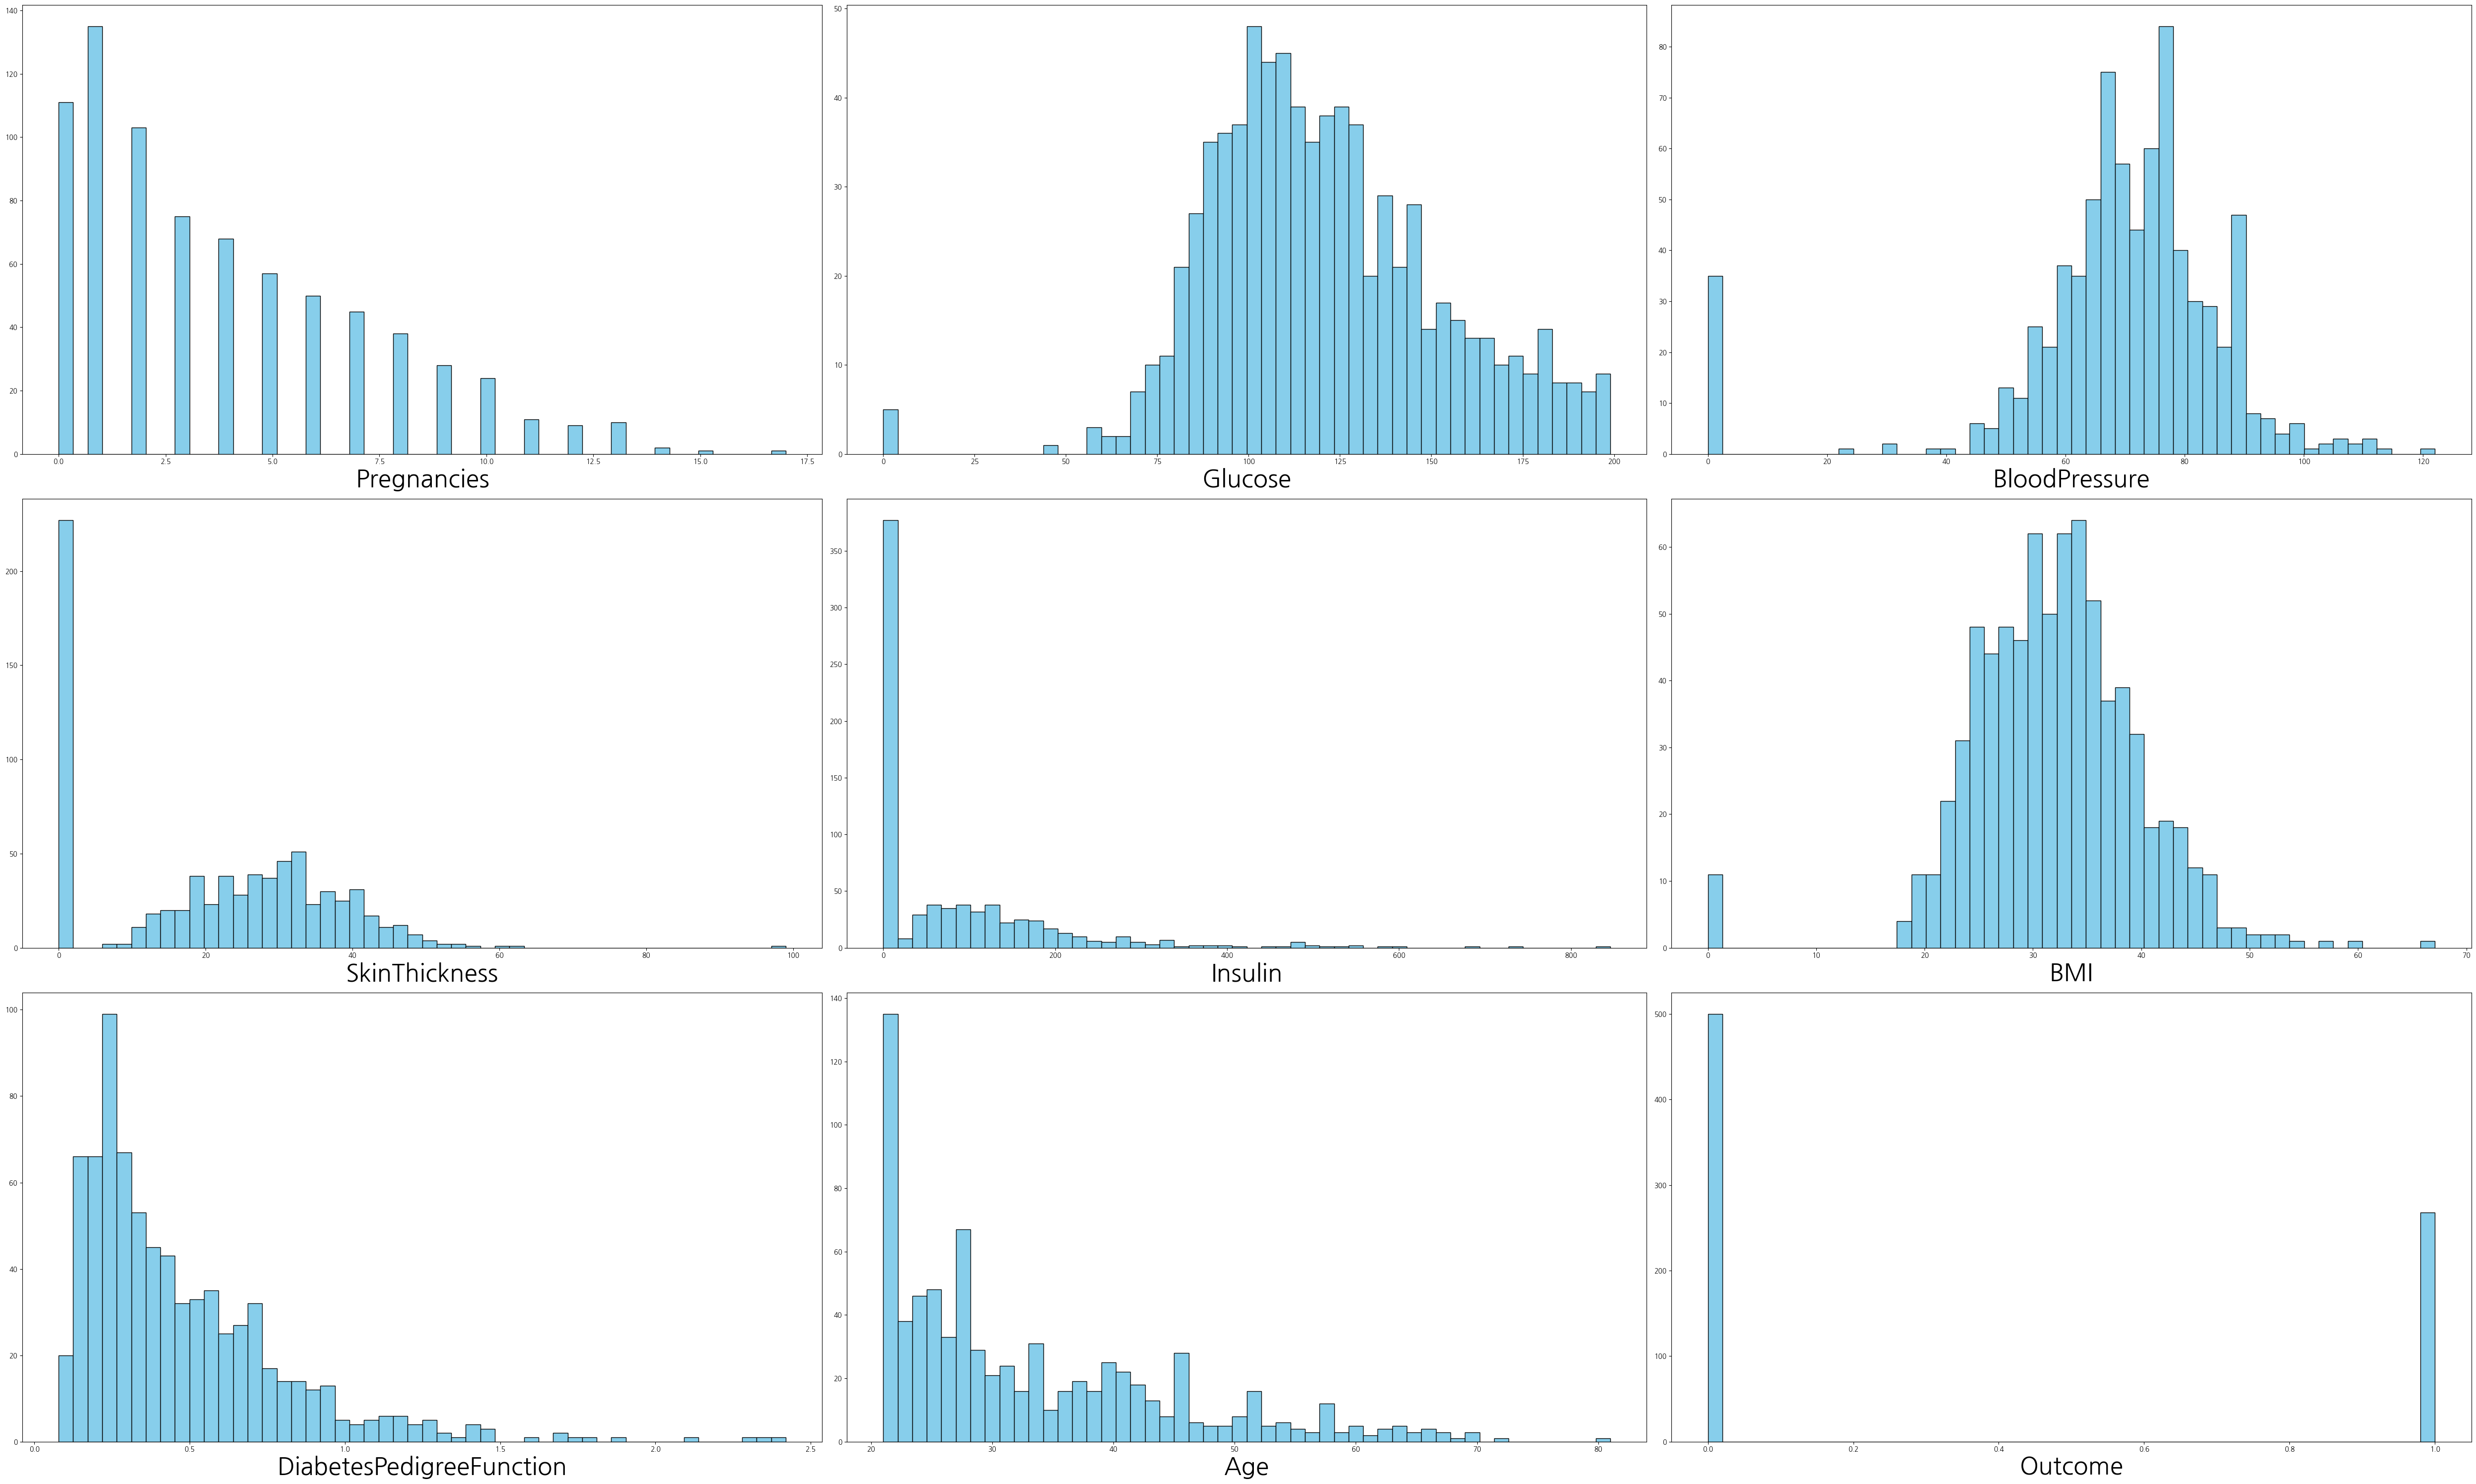

In [10]:
# 히스토그램
fig, axes = plt.subplots(hist_rows, hist_cols, figsize=(50, 30))

for i, col in enumerate(quant_vari):
    row_idx = i // hist_cols
    col_idx = i % hist_cols

    ax = axes[row_idx, col_idx] if hist_rows > 1 else axes[col_idx]
    ax.hist(data[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_xlabel(col, fontsize=35)

plt.tight_layout()
plt.show()

## 2-5. 정규성 검정

In [11]:
# 표본 크기가 2000 이하이므로 샤피로-윌크 검정 수행
for column in quant_vari:
    print(f"변수 '{column}'의 정규성 검정 결과:")

    # 샤피로-윌크 검정
    shapiro_stat, shapiro_p = stats.shapiro(data[column])
    print(f"샤피로윌크스 검정 - 통계량(statistic): {shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

변수 'Pregnancies'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9043, p-value=0.0000
변수 'Glucose'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9701, p-value=0.0000
변수 'BloodPressure'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8189, p-value=0.0000
변수 'SkinThickness'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9046, p-value=0.0000
변수 'Insulin'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.7220, p-value=0.0000
변수 'BMI'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9500, p-value=0.0000
변수 'DiabetesPedigreeFunction'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8365, p-value=0.0000
변수 'Age'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8748, p-value=0.0000
변수 'Outcome'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.6025, p-value=0.0000


**추후 비모수 검정 방법을 실시하는 것이 적절하다고 판단함**

## 2-6. 이상치 점검

### (1) 함수 설정
**GetOutlier**: IQR을 통해 이상치를 추출<br>
* df: csv파일 등에서 불러온 데이터 프레임<br>
* col: 사용하고자 하는 <u>수치형</u> 컬럼 이름<br>
* weight: 가중치, 기본값은 1.5

In [12]:
def GetOutlier(df, col, weight=1.5):
    outlier_list = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    for i in df[col]:
        if i > Q3 + weight*IQR :
            outlier_list.append(i)
        if i < Q1 - weight*IQR :
            outlier_list.append(i)

    cnt_outlier = len(outlier_list)
    uniq_outlier = list(set(outlier_list)) #고유값만 출력

    if len(outlier_list) == 0:
        print(col, '이상치 없음')

    else:
        print(col, '이상치:', np.sort(uniq_outlier))

### (2) 이상치 시각화

In [13]:
# list 형식
for numeric in quant_vari:
    GetOutlier(data, numeric)

Pregnancies 이상치: [14 15 17]
Glucose 이상치: [0]
BloodPressure 이상치: [  0  24  30 108 110 114 122]
SkinThickness 이상치: [99]
Insulin 이상치: [321 325 326 328 330 335 342 360 370 375 387 392 402 415 440 465 474 478
 480 485 495 510 540 543 545 579 600 680 744 846]
BMI 이상치: [ 0.  52.3 52.9 53.2 55.  57.3 59.4 67.1]
DiabetesPedigreeFunction 이상치: [1.213 1.222 1.224 1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.353 1.39
 1.391 1.394 1.4   1.441 1.461 1.476 1.6   1.698 1.699 1.731 1.781 1.893
 2.137 2.288 2.329 2.42 ]
Age 이상치: [67 68 69 70 72 81]
Outcome 이상치 없음


In [14]:
# subplot 행렬 차원 계산
target_cols = quant_vari[:-1]
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  # 가장 가까운 값을 사용하여 열 개수 계산

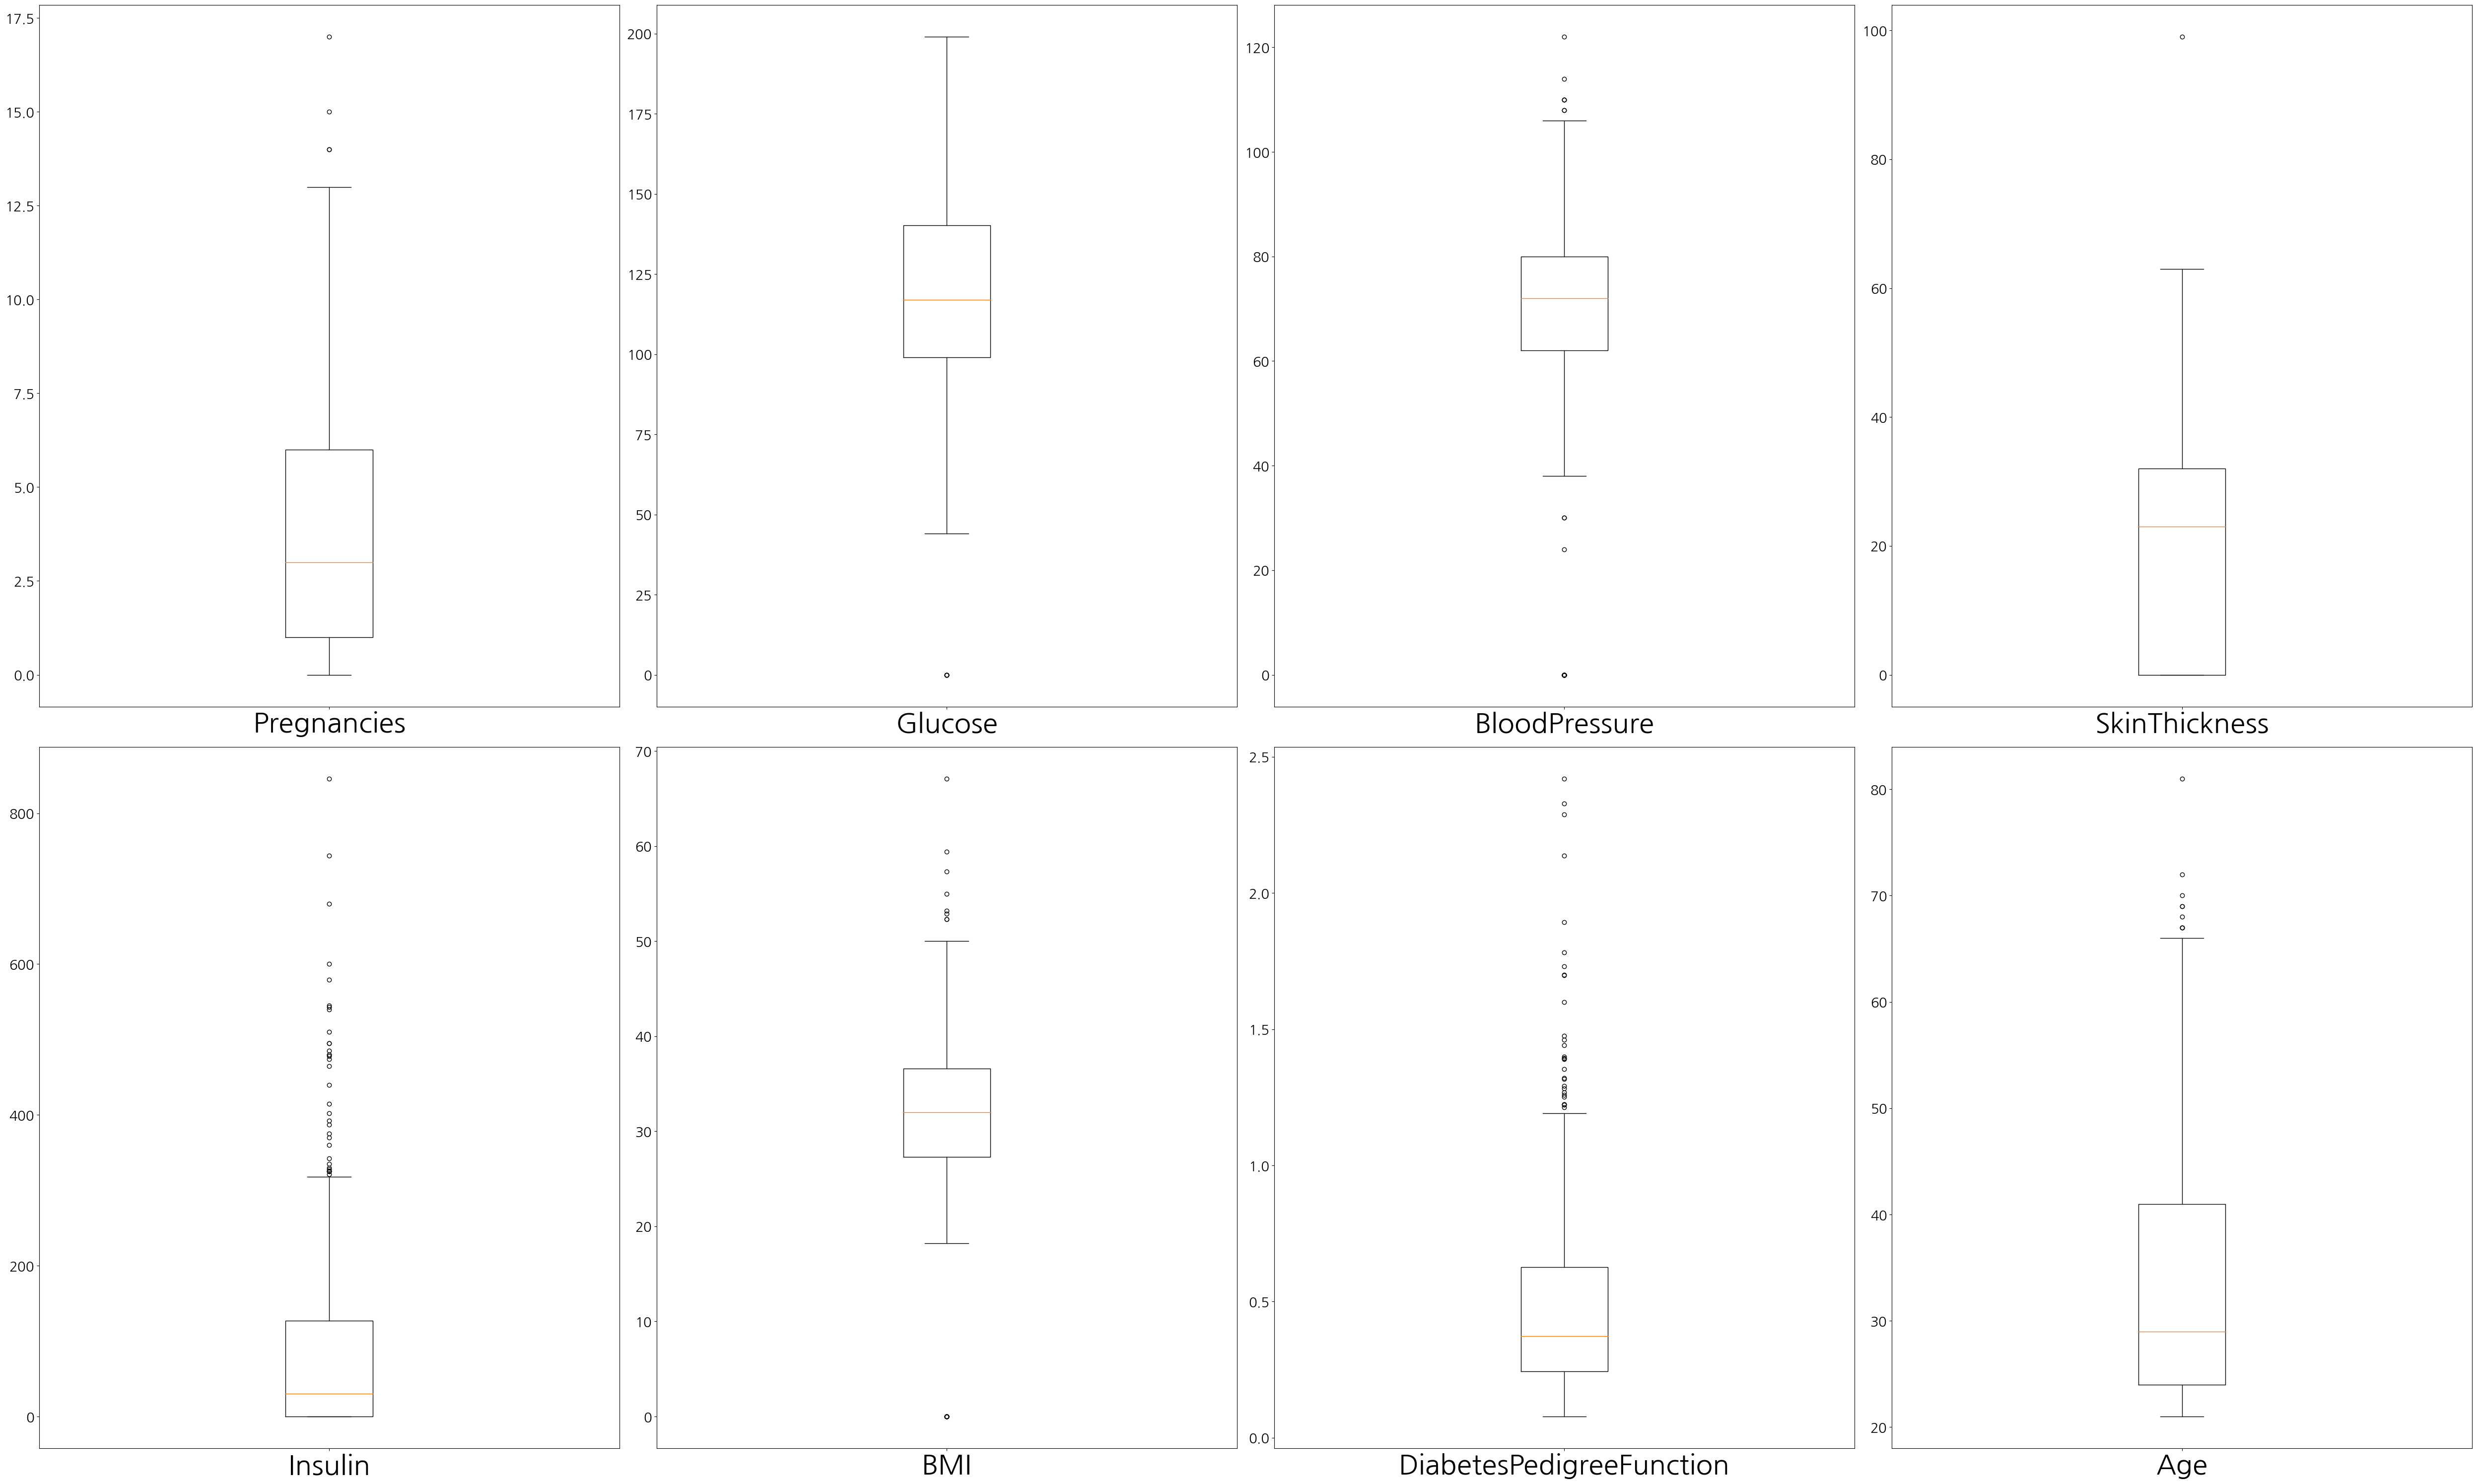

In [15]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(50, 30))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(data[col])
    ax.set_xticklabels([col], fontsize=40)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()

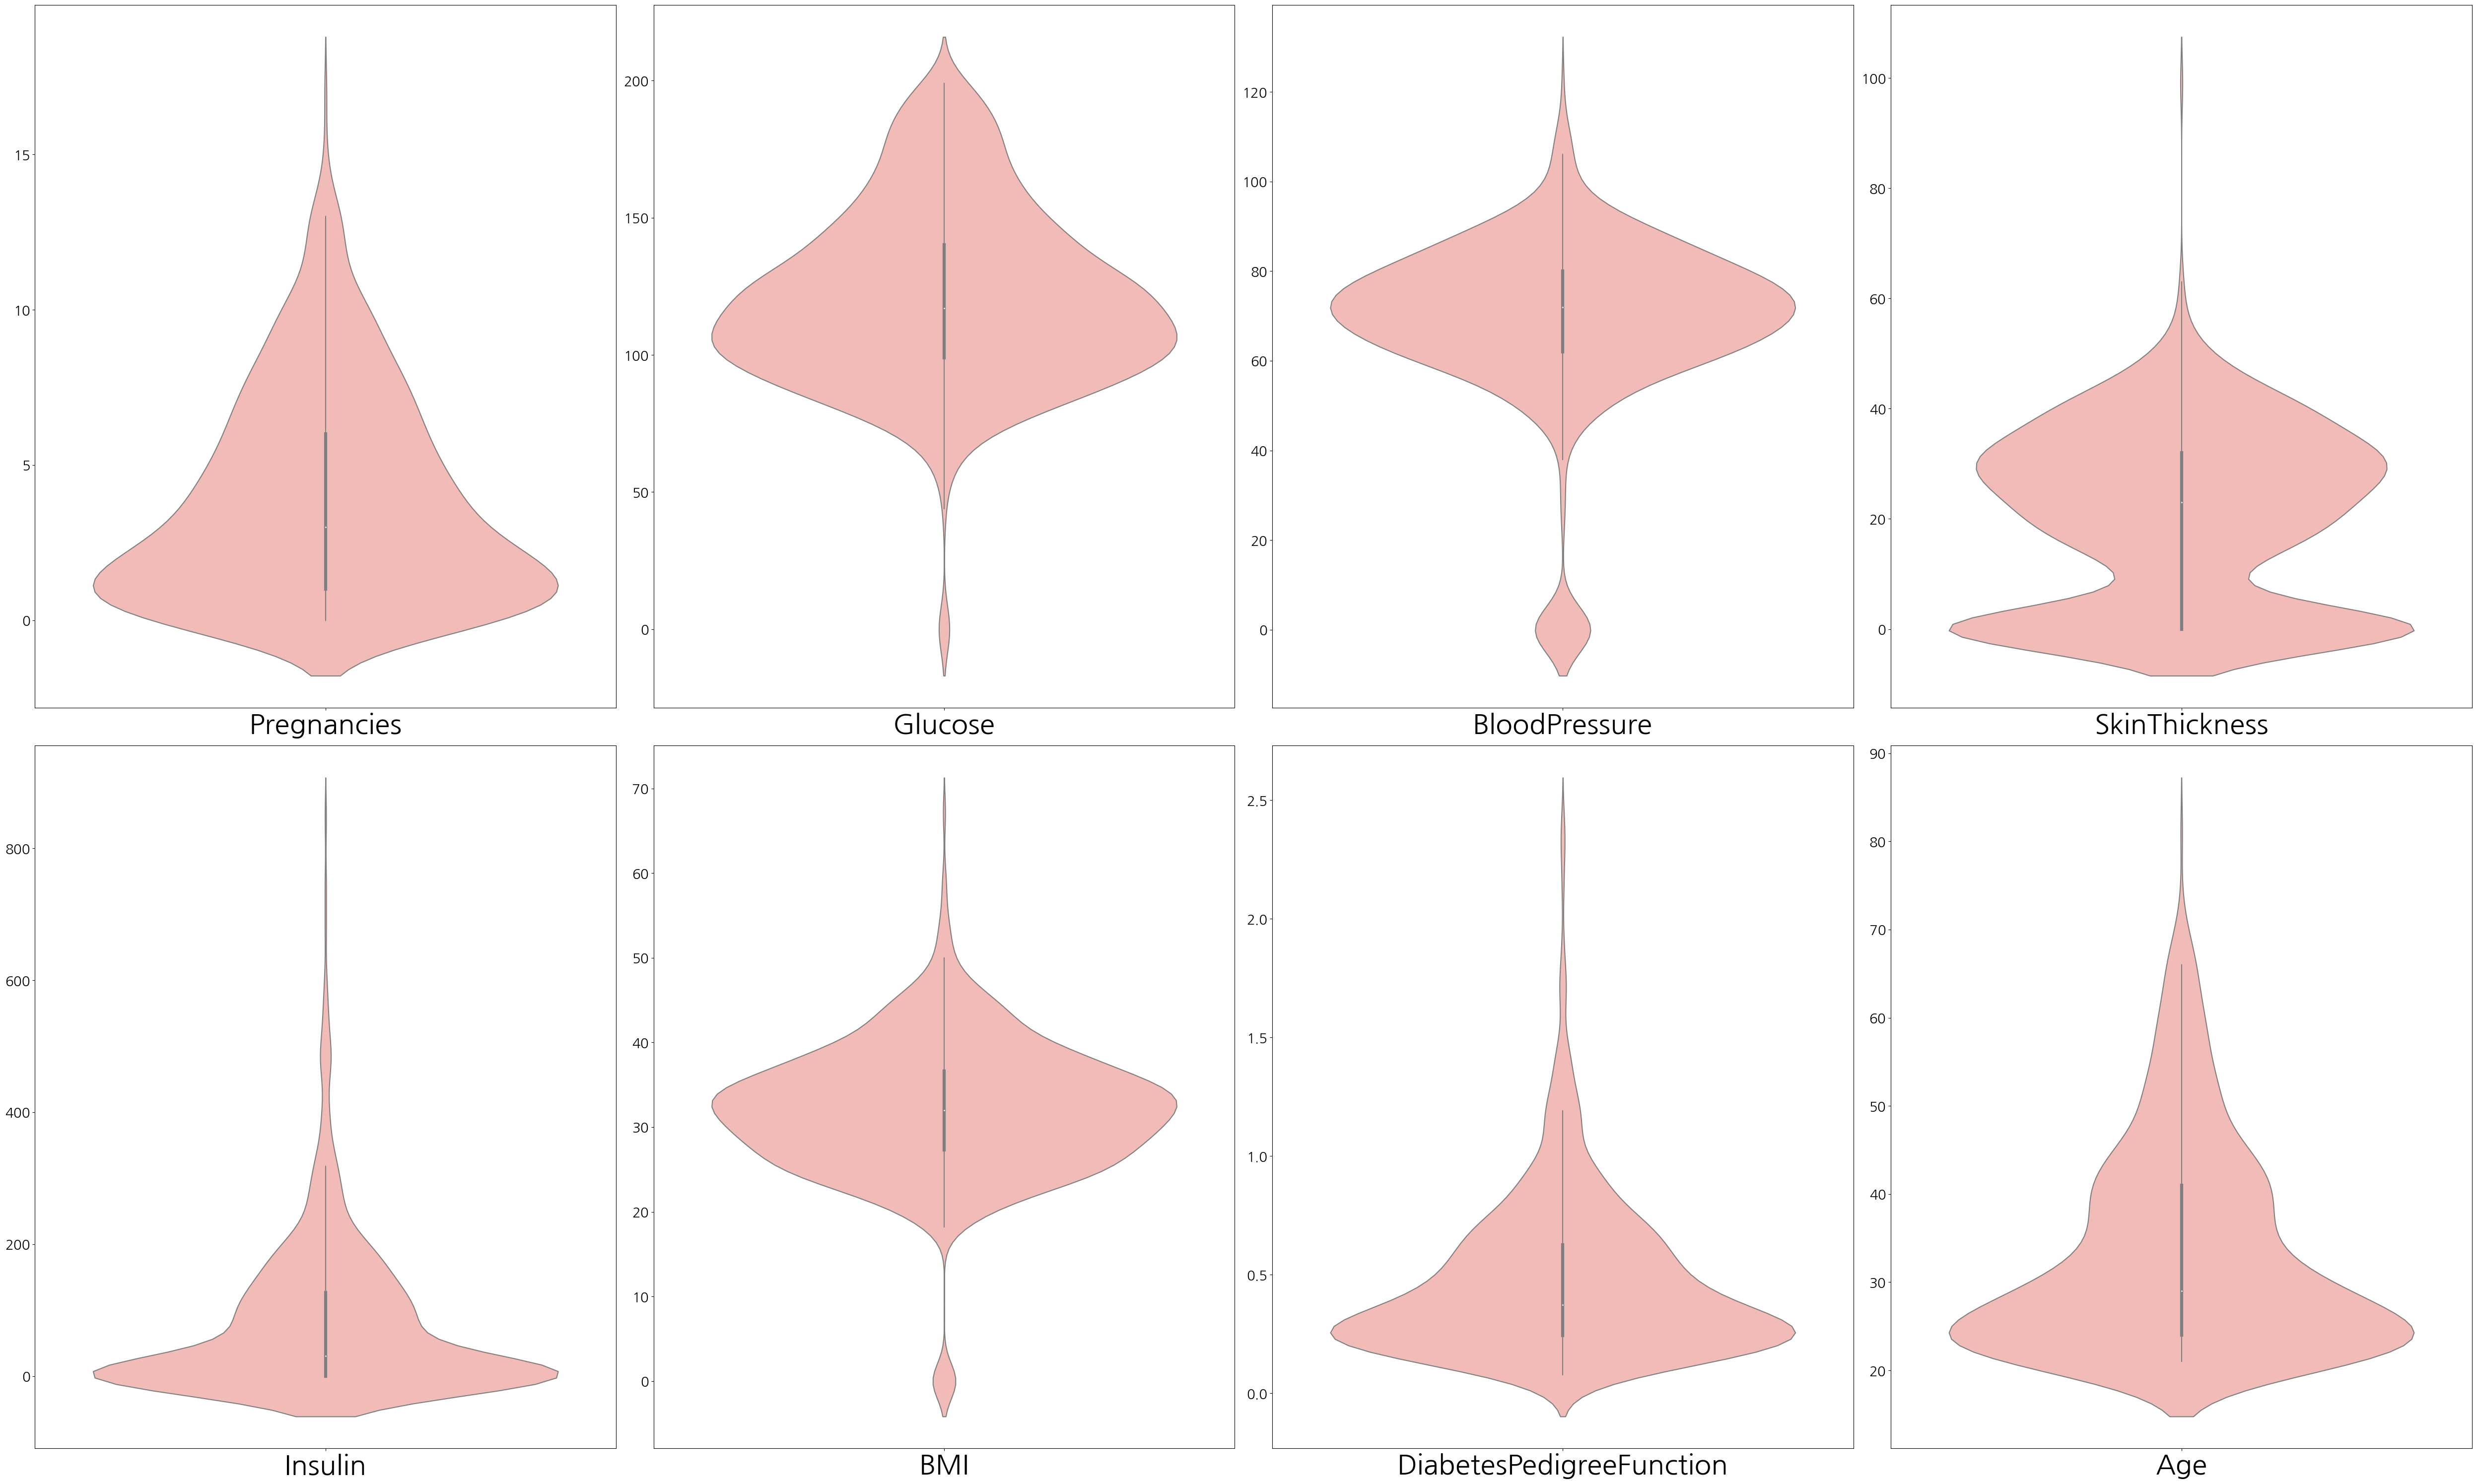

In [16]:
# Violinplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(50, 30)) #boxplot와 동일한 대상

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.violinplot(data=data[col], palette='Pastel1', ax=ax)
    ax.set_xticks([0])  # 바이올린 플롯의 x 축 라벨 설정
    ax.set_xticklabels([col], fontsize=40)
    ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()

# 3. 가설 검증 및 연구

## 3-1. 가설 또는 연구 주제 설정
---
1. 연령대에 따른 각 수치 확인
2. 각 요인에 따른 당뇨 여부 예측 모델링 (로지스틱 회귀)
    1. 요인이 서로 영향을 주는지 상관관계로 확인
    2. 다중공선성 등을 확인하여 적합한 모델 선정

## 3-2. 가설 검증 또는 연구 실행

### 연령대에 따른 각 수치 확인

In [17]:
# 연령대를 나타내는 새로운 컬럼 생성
data['AgeGroup'] = pd.cut(data['Age'],
                          bins=[20, 30, 40, 50, 60, 90], #min=21, max=81
                          labels=['20s', '30s', '40s', '50s', '60s +']) #70대와 80대가 1명씩이므로 60대 이상으로 편입

# 연령대별로 당뇨 진단 여부 집계
age_diabetes_count = data.groupby('AgeGroup')['Outcome'].value_counts().unstack()
age_diabetes_count = age_diabetes_count.reset_index().rename_axis(None, axis=1)

# 연령대별로 당뇨 진단 여부 비율 계산
age_diabetes_ratio = data.groupby('AgeGroup')['Outcome'].value_counts(normalize=True).unstack()
age_diabetes_ratio = age_diabetes_ratio.reset_index().rename_axis(None, axis=1)

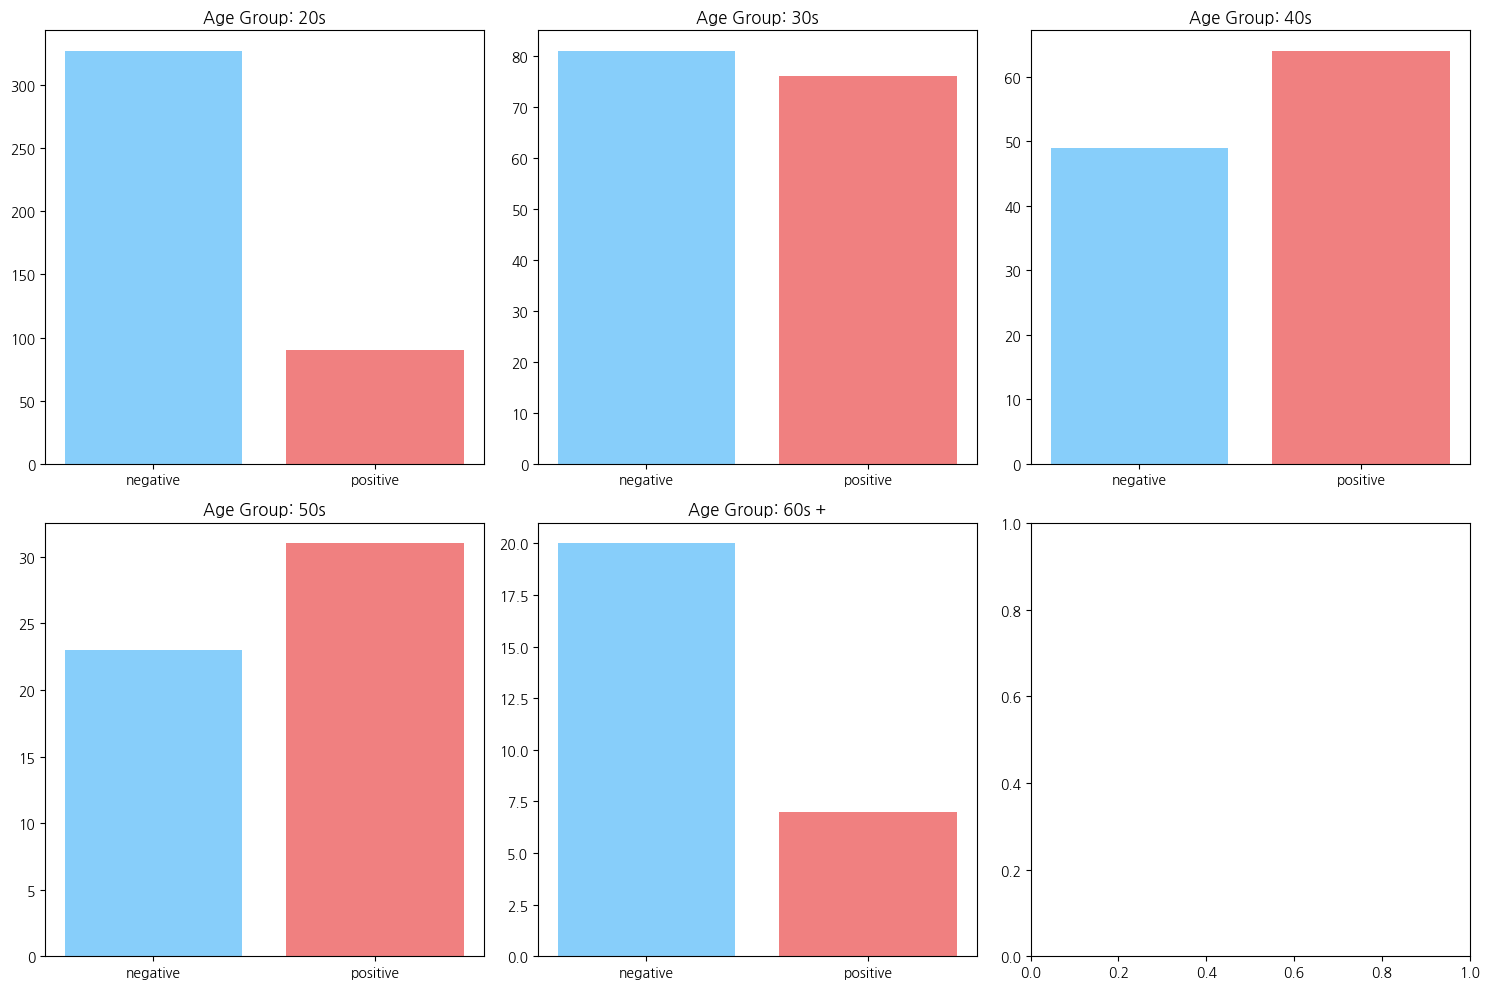

In [18]:
# barplot 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, row in enumerate(age_diabetes_count.values):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    ax.bar(x=['negative', 'positive'], height=[row[1], row[2]], color=['lightskyblue', 'lightcoral'])
    ax.set_title(f"Age Group: {row[0]}")

plt.tight_layout()
plt.show()

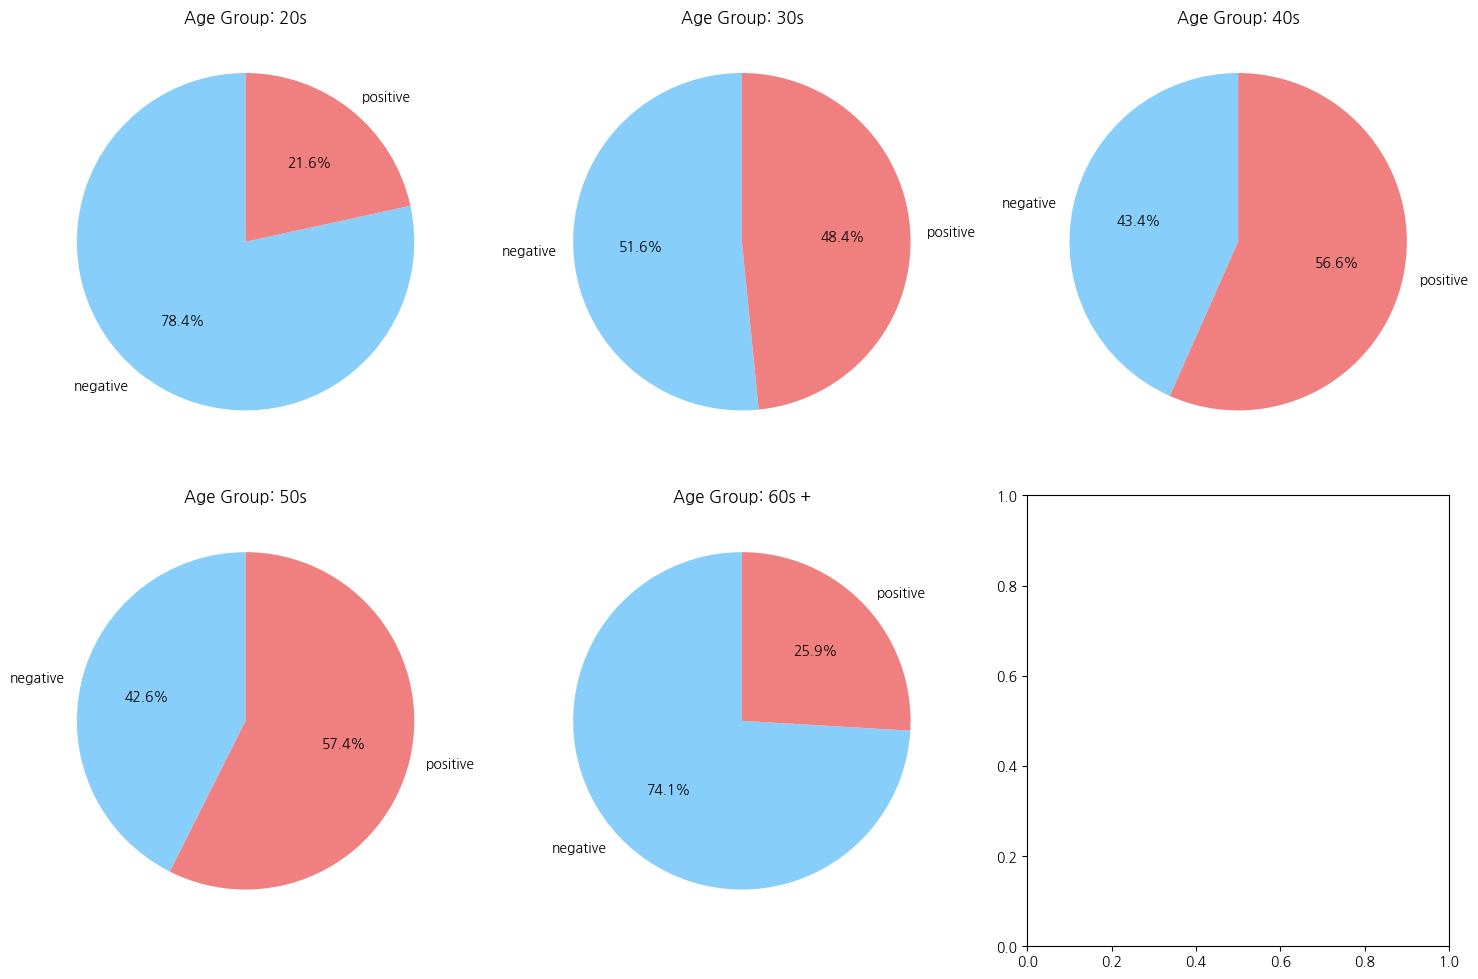

In [19]:
# pieplot 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, row in enumerate(age_diabetes_ratio.values):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    ax.pie(row[1:], labels=['negative', 'positive'], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
    ax.set_title(f"Age Group: {row[0]}")

plt.tight_layout()
plt.show()

In [20]:
# 통계적 검정 실시

### 각 요인에 따른 당뇨 여부 예측 모델링 (로지스틱 회귀)

### 중첩 요인 후보 확인

<Figure size 3000x2000 with 0 Axes>

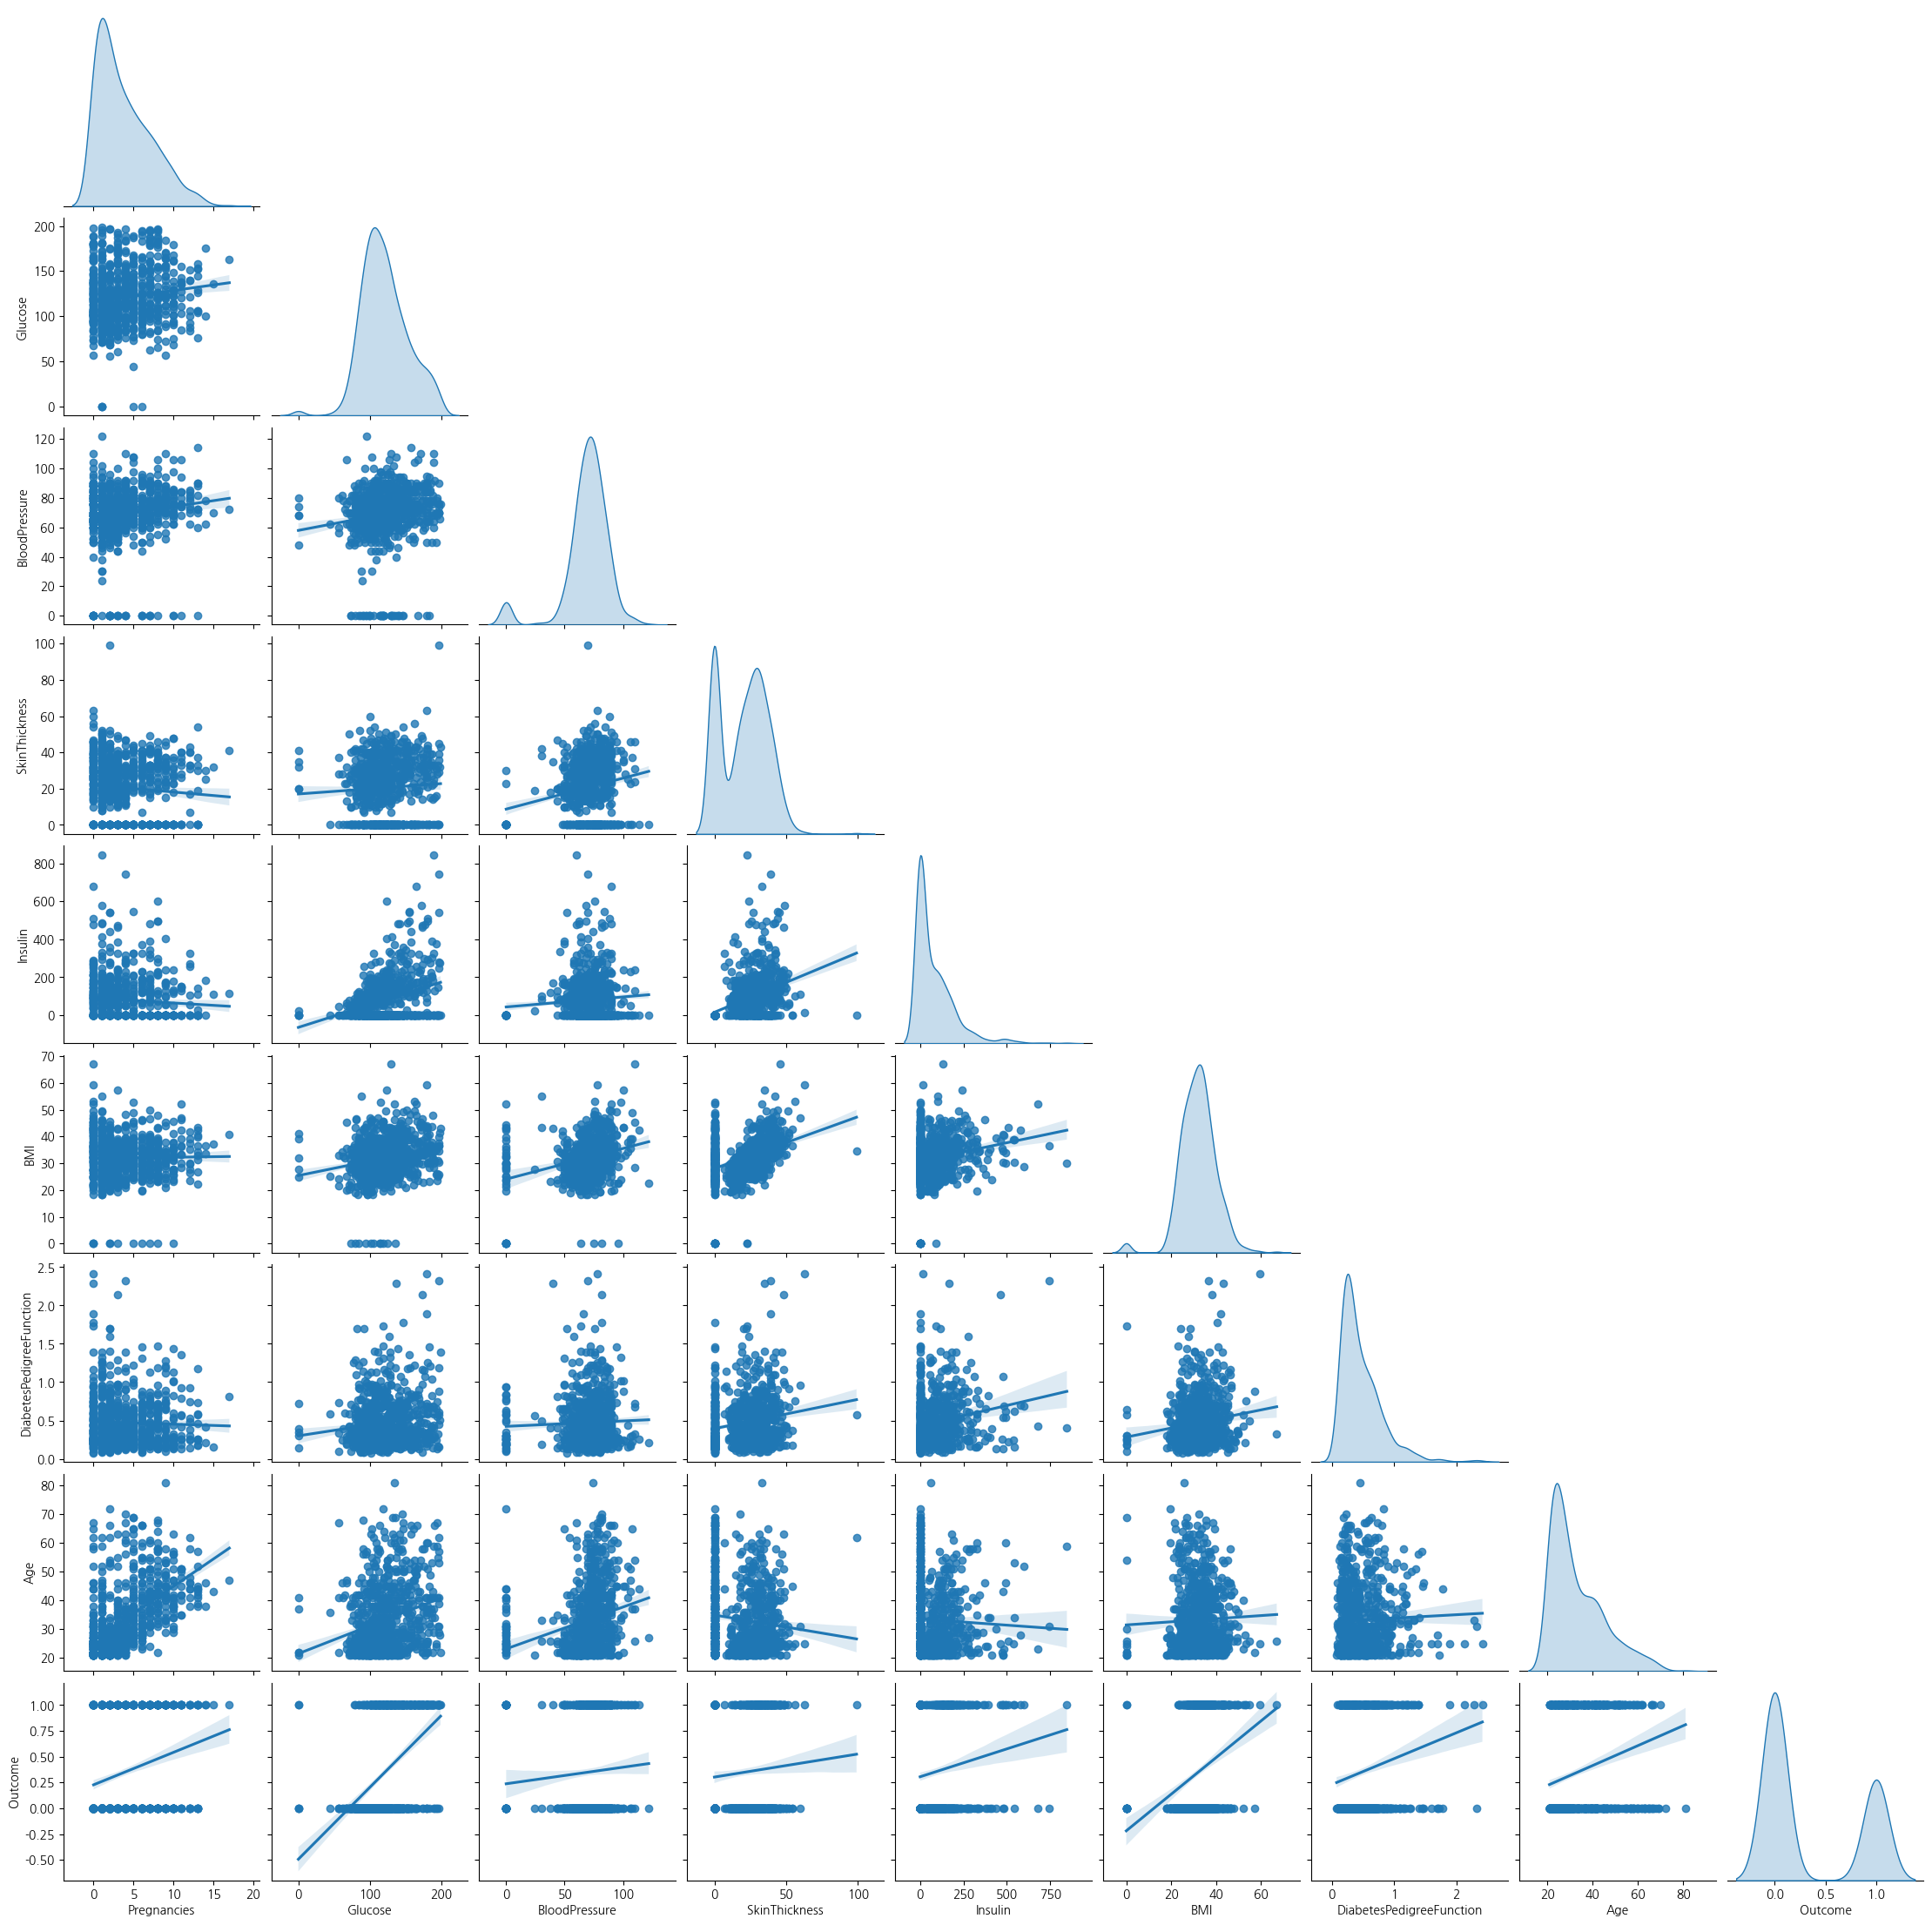

In [21]:
# 산점도 행렬
plt.figure(figsize=(30, 20))
sns.pairplot(data,
             kind="reg", #회귀직선 추가
             diag_kind='kde', #분포 추정 시각화
             corner=True) #하삼각행렬 및 대각행렬만 출력

plt.show()

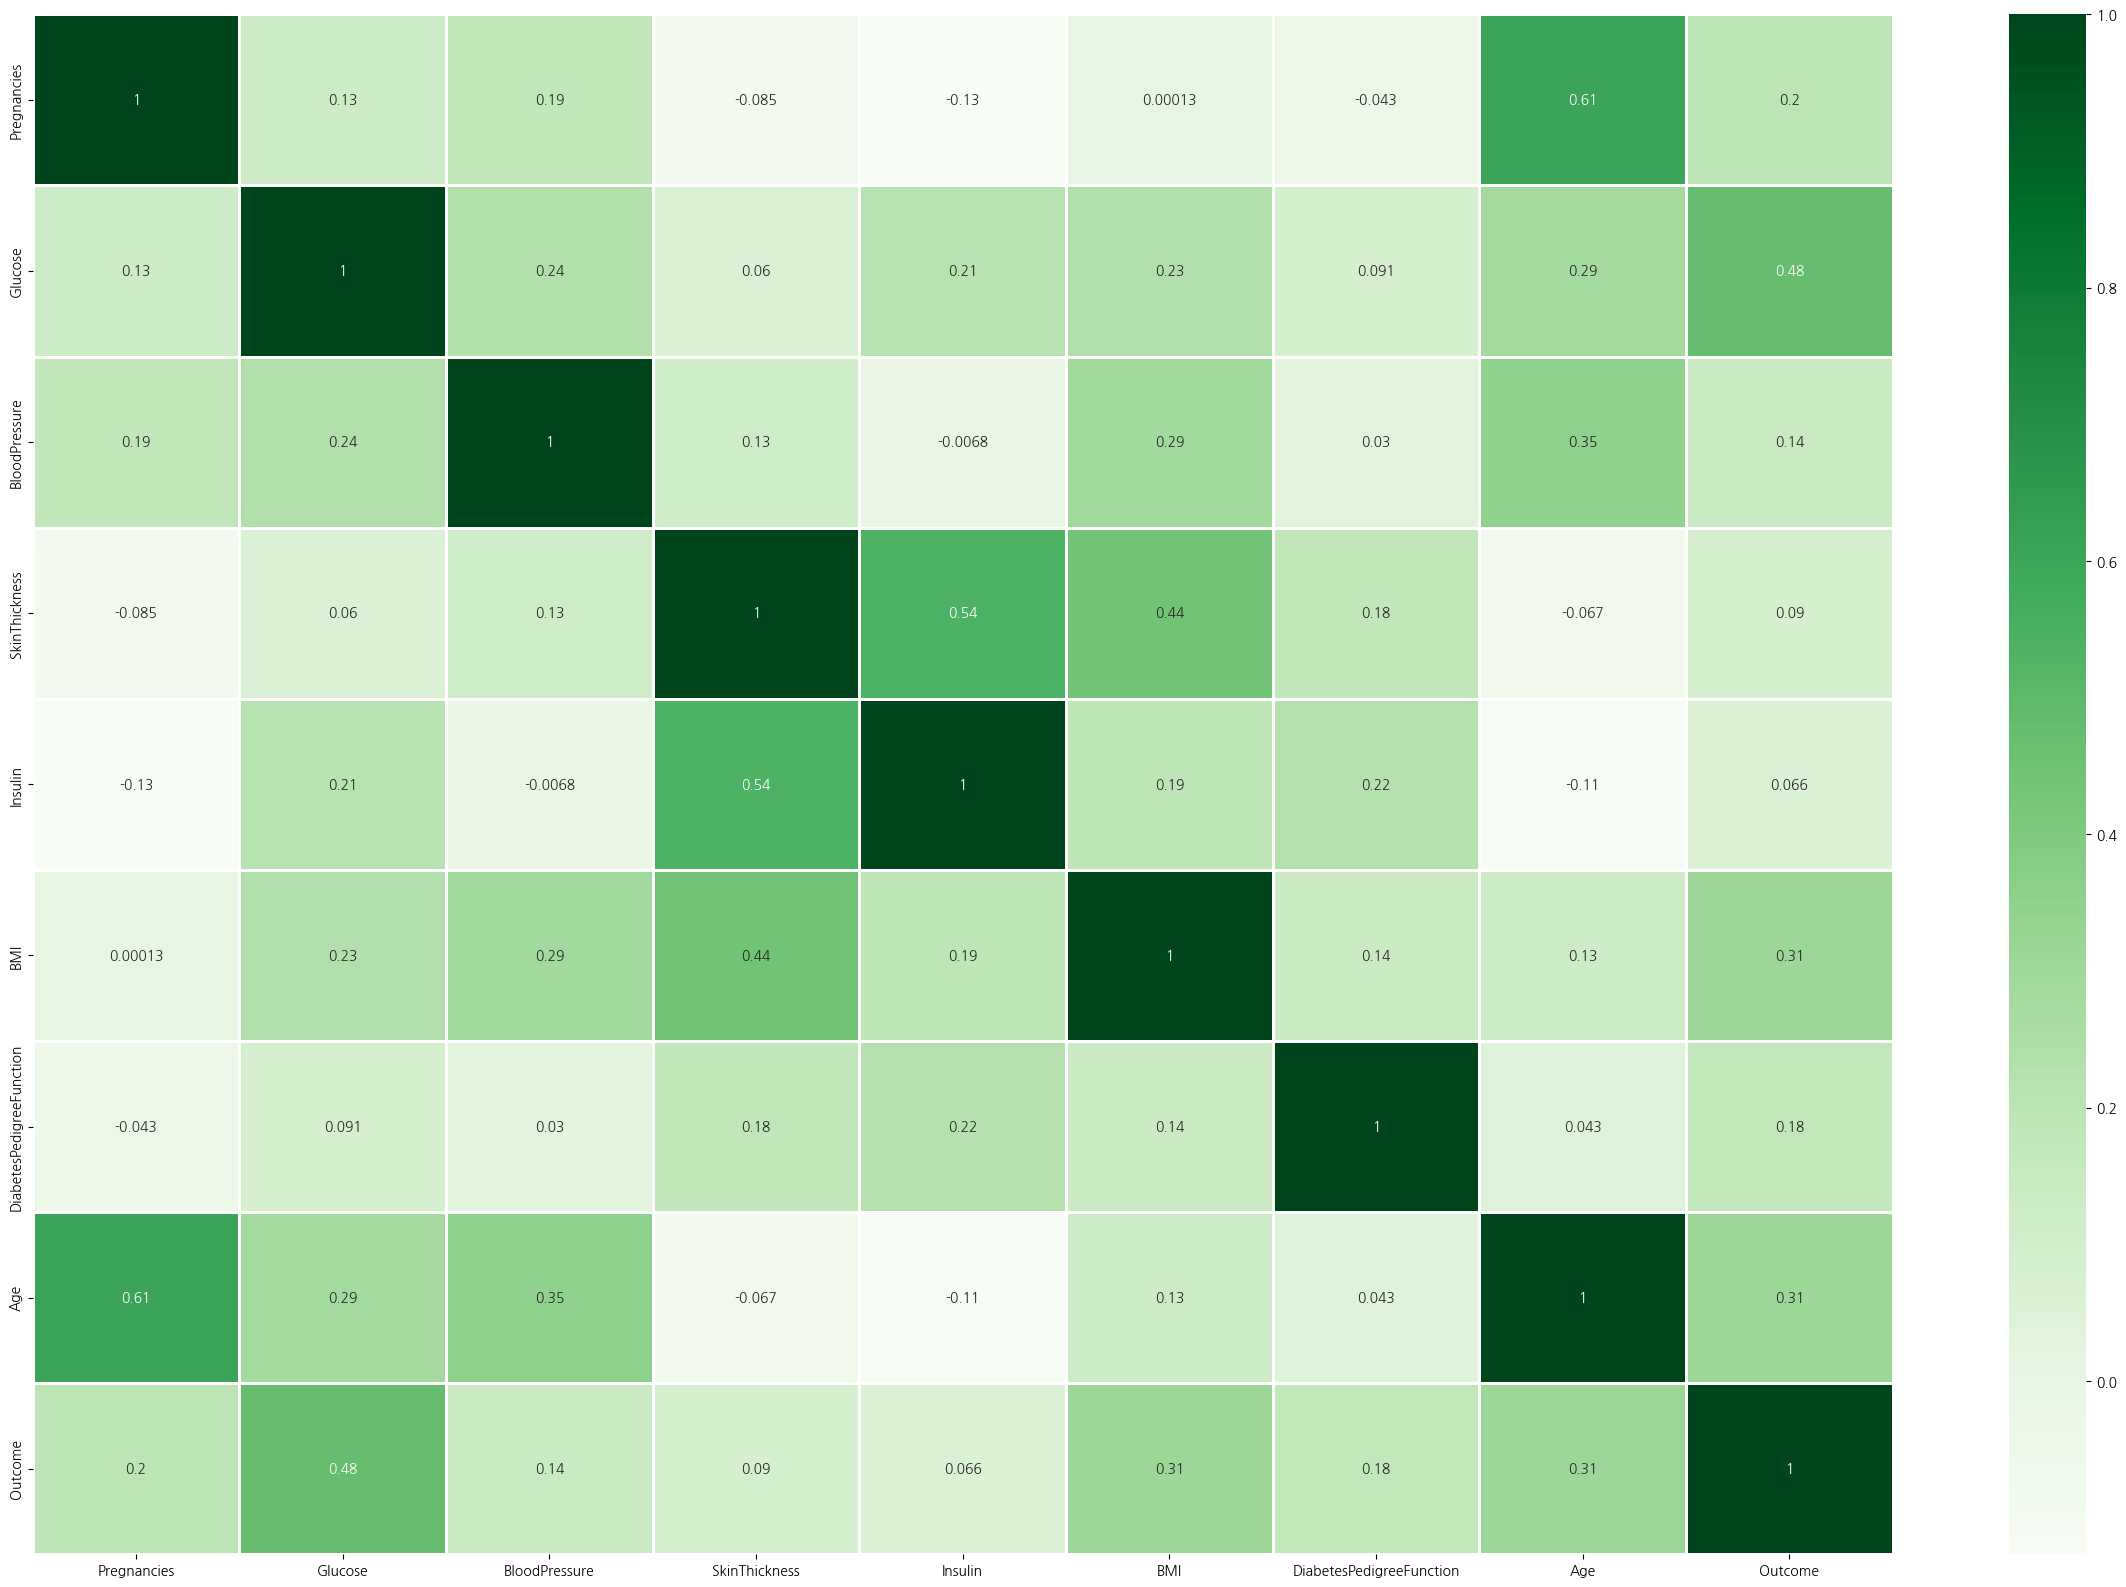

In [22]:
# 상관관계 히트맵(비모수검정)
plt.figure(figsize=(30, 20))
sns.heatmap(data.iloc[:, :-1].corr(method='spearman'), annot=True, cmap='Greens', linewidths=0.8)
plt.show()

* Age - Pregnancies(0.61): 나이를 먹으면 임신 횟수도 자연히 늘어날 것
* Outcome - Glucose(0.48): 혈중 glucose 농도로 당뇨를 진단하므로 당연한 결과임
* SkinThickness - BMI(0.44): BMI는 체중으로 계산하므로, 피하지방이 두꺼울수록 자연히 증가할 것
---
* SkinThickness - Insulin(0.54): 바로 생각나는 관련성이 없으므로 분석 대상으로 고려해볼 만하다고 판단 / 단, 강한 상관관계는 아님

### 다변수 로지스틱 회귀분석 시행

In [23]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
16,0,118,84,47,230,45.8,0.551,31,1,30s
393,4,116,72,12,87,22.1,0.463,37,0,30s
661,1,199,76,43,0,42.9,1.394,22,1,20s
294,0,161,50,0,0,21.9,0.254,65,0,60s +
237,0,179,90,27,0,44.1,0.686,23,1,20s


In [24]:
data.iloc[:, :-2].sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
482,4,85,58,22,49,27.8,0.306,28
705,6,80,80,36,0,39.8,0.177,28
255,1,113,64,35,0,33.6,0.543,21
525,3,87,60,18,0,21.8,0.444,21
742,1,109,58,18,116,28.5,0.219,22


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 독립 변수와 종속 변수
X = data.iloc[:, :-2]
y = data['Outcome']